In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 10,8
sns.set(style='whitegrid', palette='muted',
        rc={'figure.figsize': (15,10)})
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

from numpy.random import seed
import tensorflow as tf
from tensorflow.random import set_seed 

# puede ser necesario o no, dependiendo de su versión de NoteBook
%matplotlib inline

In [2]:
df = pd.read_csv('./datafinal.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  30000 non-null  int64  
 1   limit_bal           30000 non-null  float64
 2   sex                 30000 non-null  int64  
 3   education           30000 non-null  int64  
 4   marriage            30000 non-null  int64  
 5   age                 30000 non-null  int64  
 6   pay_sep             30000 non-null  int64  
 7   pay_ago             30000 non-null  int64  
 8   pay_jul             30000 non-null  int64  
 9   pay_jun             30000 non-null  int64  
 10  pay_may             30000 non-null  int64  
 11  pay_apr             30000 non-null  int64  
 12  bill_amt_sep        30000 non-null  float64
 13  bill_amt_ago        30000 non-null  float64
 14  bill_amt_jul        30000 non-null  float64
 15  bill_amt_jun        30000 non-null  float64
 16  bill

In [4]:
df.head()

,id,limit_bal,sex,education,marriage,age,pay_sep,pay_ago,pay_jul,pay_jun,...,bill_amt_jun,bill_amt_may,bill_amt_apr,pay_amt_sep,pay_amt_ago,pay_amt_jul,pay_amt_jun,pay_amt_may,pay_amt_apr,payment_next_month
0,1,20000.0,1,2,0,24,2,0,-1,0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,1,2,1,26,0,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,1,2,1,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,1,2,0,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,0,2,0,57,0,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## Preparación de los datos

In [5]:
# eliminar columna con info poco valiosa
#df.drop('id', axis=1, inplace=True)

In [6]:
var_dummies = ['education', 'marriage', 'pay_sep', 'pay_ago', 'pay_jul', 'pay_jun', 'pay_may', 'pay_apr']

for i in var_dummies:
    # convertir a variables dummies
    value_dummies = pd.get_dummies(df[i], prefix=i, drop_first=True)
    df = pd.concat([df.drop(i, axis=1), value_dummies], axis=1)

df.columns

Index(['id', 'limit_bal', 'sex', 'age', 'bill_amt_sep', 'bill_amt_ago',
       'bill_amt_jul', 'bill_amt_jun', 'bill_amt_may', 'bill_amt_apr',
       'pay_amt_sep', 'pay_amt_ago', 'pay_amt_jul', 'pay_amt_jun',
       'pay_amt_may', 'pay_amt_apr', 'payment_next_month', 'education_1',
       'education_2', 'education_3', 'education_4', 'marriage_1', 'marriage_2',
       'pay_sep_1', 'pay_sep_2', 'pay_sep_3', 'pay_sep_4', 'pay_sep_5',
       'pay_sep_6', 'pay_sep_7', 'pay_sep_8', 'pay_ago_0', 'pay_ago_1',
       'pay_ago_2', 'pay_ago_3', 'pay_ago_4', 'pay_ago_5', 'pay_ago_6',
       'pay_ago_7', 'pay_ago_8', 'pay_jul_0', 'pay_jul_1', 'pay_jul_2',
       'pay_jul_3', 'pay_jul_4', 'pay_jul_5', 'pay_jul_6', 'pay_jul_7',
       'pay_jul_8', 'pay_jun_1', 'pay_jun_2', 'pay_jun_3', 'pay_jun_4',
       'pay_jun_5', 'pay_jun_6', 'pay_jun_7', 'pay_jun_8', 'pay_may_2',
       'pay_may_3', 'pay_may_4', 'pay_may_5', 'pay_may_6', 'pay_may_7',
       'pay_may_8', 'pay_apr_2', 'pay_apr_3', 'pay_apr_4', '

## División Train/Test

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = df.drop('payment_next_month', axis=1).values
y = df['payment_next_month'].values

In [9]:
# dividir en entrenamiento y testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

## Normalización de los datos

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler()

In [12]:
X_train = scaler.fit_transform(X_train)

In [13]:
X_test = scaler.transform(X_test)

## RNA

###  RNA (Red Neuronal Artificial)

In [14]:
def create_model(lyrs=[8], act='linear', opt='Adam', dr=0.0):
    
    # set random seed for reproducibility
    seed(42)
    tf.random.set_seed(42)
    
    model = Sequential()
    
    # create first hidden layer
    model.add(Dense(lyrs[0], input_dim=X_train.shape[1], activation=act))
    
    # create additional hidden layers
    for i in range(1,len(lyrs)):
        model.add(Dense(lyrs[i], activation=act))
    
    # add dropout, default is none
    model.add(Dropout(dr))
    
    # create output layer
    model.add(Dense(1, activation='sigmoid'))  # output layer
    
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    return model

In [15]:
model = create_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 568       
_________________________________________________________________
dropout (Dropout)            (None, 8)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 577
Trainable params: 577
Non-trainable params: 0
_________________________________________________________________
None


## Train Model

In [16]:
# train model on full train set, with 80/20 CV split
training = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)
val_acc = np.mean(training.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy', val_acc*100))


val_accuracy: 81.39%


In [17]:
training.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

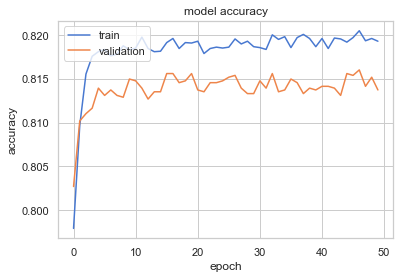

In [18]:
# summarize history for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Grid Search

In [19]:
# create model
model = KerasClassifier(build_fn=create_model, verbose=0)

# define the grid search parameters
batch_size = [16, 32, 64]
epochs = [50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)

# search the grid
grid = GridSearchCV(estimator=model, 
                    param_grid=param_grid,
                    cv=3,
                    verbose=2)  # include n_jobs=-1 if you are using CPU

grid_result = grid.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END ...........................batch_size=16, epochs=50; total time= 1.1min
[CV] END ...........................batch_size=16, epochs=50; total time= 1.1min
[CV] END ...........................batch_size=16, epochs=50; total time= 2.6min
[CV] END ..........................batch_size=16, epochs=100; total time=  56.0s
[CV] END ..........................batch_size=16, epochs=100; total time=  52.8s
[CV] END ..........................batch_size=16, epochs=100; total time=  53.8s
[CV] END ...........................batch_size=32, epochs=50; total time=  13.8s
[CV] END ...........................batch_size=32, epochs=50; total time=  13.6s
[CV] END ...........................batch_size=32, epochs=50; total time=  14.0s
[CV] END ..........................batch_size=32, epochs=100; total time=  28.0s
[CV] END ..........................batch_size=32, epochs=100; total time=  27.9s
[CV] END ..........................batch_size=32,

In [20]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.817667 using {'batch_size': 64, 'epochs': 100}
0.816042 (0.006753) with: {'batch_size': 16, 'epochs': 50}
0.814958 (0.005280) with: {'batch_size': 16, 'epochs': 100}
0.816500 (0.006525) with: {'batch_size': 32, 'epochs': 50}
0.816875 (0.005977) with: {'batch_size': 32, 'epochs': 100}
0.817125 (0.006752) with: {'batch_size': 64, 'epochs': 50}
0.817667 (0.006889) with: {'batch_size': 64, 'epochs': 100}


## Optimizacion del modelo

In [21]:
# create model
model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=32, verbose=0)

# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Nadam']
param_grid = dict(opt=optimizer)

# search the grid
grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=2)
grid_result = grid.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ............................................opt=SGD; total time=  20.5s
[CV] END ............................................opt=SGD; total time=  20.0s
[CV] END ............................................opt=SGD; total time=  20.6s
[CV] END ............................................opt=SGD; total time=  20.8s
[CV] END ............................................opt=SGD; total time=  20.6s
[CV] END ........................................opt=RMSprop; total time=  22.7s
[CV] END ........................................opt=RMSprop; total time=  22.8s
[CV] END ........................................opt=RMSprop; total time=  22.5s
[CV] END ........................................opt=RMSprop; total time=  22.4s
[CV] END ........................................opt=RMSprop; total time=  22.9s
[CV] END ........................................opt=Adagrad; total time=  16.2s
[CV] END ........................................

In [22]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.817458 using {'opt': 'Nadam'}
0.816958 (0.005056) with: {'opt': 'SGD'}
0.816417 (0.004424) with: {'opt': 'RMSprop'}
0.800833 (0.002758) with: {'opt': 'Adagrad'}
0.783833 (0.003619) with: {'opt': 'Adadelta'}
0.817417 (0.005182) with: {'opt': 'Adam'}
0.817458 (0.005146) with: {'opt': 'Nadam'}


### Hidden neurons

In [23]:
seed(42)
tf.random.set_seed(42)

# create model
model = KerasClassifier(build_fn=create_model, 
                        epochs=50, batch_size=32, verbose=0)

# define the grid search parameters
layers = [[8],[10],[10,5],[12,6],[12,8,4]]
param_grid = dict(lyrs=layers)

# search the grid
grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=2)
grid_result = grid.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ...........................................lyrs=[8]; total time=  17.2s
[CV] END ...........................................lyrs=[8]; total time=  16.2s
[CV] END ...........................................lyrs=[8]; total time=  16.3s
[CV] END ...........................................lyrs=[8]; total time=  16.5s
[CV] END ...........................................lyrs=[8]; total time=  16.3s
[CV] END ..........................................lyrs=[10]; total time=  16.3s
[CV] END ..........................................lyrs=[10]; total time=  16.2s
[CV] END ..........................................lyrs=[10]; total time=  16.9s
[CV] END ..........................................lyrs=[10]; total time=  16.4s
[CV] END ..........................................lyrs=[10]; total time=  16.4s
[CV] END .......................................lyrs=[10, 5]; total time=  18.2s
[CV] END .......................................l

In [24]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.817542 using {'lyrs': [10]}
0.817417 (0.005182) with: {'lyrs': [8]}
0.817542 (0.005246) with: {'lyrs': [10]}
0.817292 (0.005189) with: {'lyrs': [10, 5]}
0.817375 (0.005039) with: {'lyrs': [12, 6]}
0.817167 (0.004785) with: {'lyrs': [12, 8, 4]}


### Dropout

In [25]:
# create model
model = KerasClassifier(build_fn=create_model, 
                        epochs=50, batch_size=32, verbose=0)

# define the grid search parameters
drops = [0.0, 0.01, 0.05, 0.1, 0.2, 0.5]
param_grid = dict(dr=drops)
grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=2)
grid_result = grid.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END .............................................dr=0.0; total time=  17.0s
[CV] END .............................................dr=0.0; total time=  16.7s
[CV] END .............................................dr=0.0; total time=  16.1s
[CV] END .............................................dr=0.0; total time=  16.3s
[CV] END .............................................dr=0.0; total time=  16.4s
[CV] END ............................................dr=0.01; total time=  16.4s
[CV] END ............................................dr=0.01; total time=  17.0s
[CV] END ............................................dr=0.01; total time=  18.1s
[CV] END ............................................dr=0.01; total time=  17.3s
[CV] END ............................................dr=0.01; total time=  17.1s
[CV] END ............................................dr=0.05; total time=  16.7s
[CV] END ........................................

In [26]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.817625 using {'dr': 0.01}
0.817417 (0.005182) with: {'dr': 0.0}
0.817625 (0.005347) with: {'dr': 0.01}
0.817375 (0.004883) with: {'dr': 0.05}
0.817333 (0.005253) with: {'dr': 0.1}
0.817458 (0.005345) with: {'dr': 0.2}
0.817375 (0.004498) with: {'dr': 0.5}


In [27]:
# create final model
model = create_model(lyrs=[8], dr=0.2)

print(model.summary())

Model: "sequential_108"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_236 (Dense)            (None, 8)                 568       
_________________________________________________________________
dropout_108 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_237 (Dense)            (None, 1)                 9         
Total params: 577
Trainable params: 577
Non-trainable params: 0
_________________________________________________________________
None


In [28]:
# train model on full train set, with 80/20 CV split
training = model.fit(X_train, y_train, epochs=50, batch_size=32, 
                     validation_split=0.2, verbose=0)

# evaluate the model
scores = model.evaluate(X_train, y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

750/750 [==============================] - 1s 924us/step - loss: 0.4390 - accuracy: 0.8190

accuracy: 81.90%


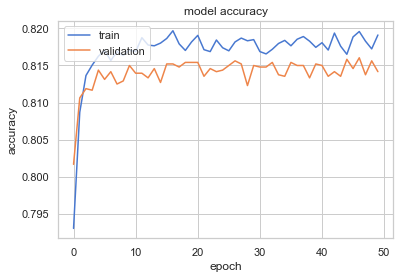

In [29]:
# summarize history for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Predicciones

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 71 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  30000 non-null  int64  
 1   limit_bal           30000 non-null  float64
 2   sex                 30000 non-null  int64  
 3   age                 30000 non-null  int64  
 4   bill_amt_sep        30000 non-null  float64
 5   bill_amt_ago        30000 non-null  float64
 6   bill_amt_jul        30000 non-null  float64
 7   bill_amt_jun        30000 non-null  float64
 8   bill_amt_may        30000 non-null  float64
 9   bill_amt_apr        30000 non-null  float64
 10  pay_amt_sep         30000 non-null  float64
 11  pay_amt_ago         30000 non-null  float64
 12  pay_amt_jul         30000 non-null  float64
 13  pay_amt_jun         30000 non-null  float64
 14  pay_amt_may         30000 non-null  float64
 15  pay_amt_apr         30000 non-null  float64
 16  paym

In [31]:
#mylist = range(0, 6000)
dftest = df[:6000]
#dftest['client_id'] = mylist

In [32]:
# calculate predictions
dftest['payment_next_month'] = model.predict(X_test)
dftest['payment_next_month'] = dftest['payment_next_month'].apply(lambda x: round(x,0)).astype('int')
solution = dftest[['id', 'payment_next_month']]
solution.head(10)

c:\users\camila\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,id,payment_next_month
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
5,6,0
6,7,0
7,8,0
8,9,0
9,10,0
